# dftdecompose -  Illustrate the decomposition of the image in primitive 2-D waves

This demonstration illustrates the decomposition of a step function image into cossenoidal waves of increasing frequencies.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys,os    

In [2]:
def dftdecompose(f,u):
    '''
    Inputs:
    f - image
    u - cossenoid sum level
    '''
    import numpy as np
    import matplotlib.pyplot as plt

    F = np.fft.fft2(f) # Transfomada de f
    H,W = f.shape
    Fsum = np.zeros_like(F) # Variável acumulativa de cossenoides
    Flast = np.zeros_like(F)
    
    
    for ui in range(0,u+1):
        Faux = np.zeros_like(F) 
        # Extraindo a cossenoide em u
        Faux[:,ui] = F[:,ui]
        Faux[:,W-ui-1] = F[:,W-ui-1]
        # Acumulando as cossenoides 
        Fsum += Faux 
        if ((ui+1) == u+1):
            Flast = Faux
            
    plt.figure(1,figsize=(12,12))                   
    plt.subplot(131)
    plt.imshow(f,cmap='gray')
    plt.title("imagem original")
    plt.subplot(132)
    plt.imshow(np.abs(np.fft.ifft2(Fsum)),cmap='gray')
    plt.title("somatório em u = {}".format(u))
    plt.subplot(133)
    plt.imshow(np.abs(np.fft.ifft2(Flast)),cmap='gray')
    plt.title("cossenoide em u = {}".format(u))  

In [3]:
testing = (__name__ == '__main__')

if testing:
    import sys,os
    ! jupyter nbconvert --to 'python' dftdecompose

    path = os.path.abspath('/etc/jupyterhub/ia898_1s2017/d191122/Aula_7/')
    if path not in sys.path:
        sys.path.append(path)
    import dftdecompose as dftdecom

[NbConvertApp] Converting notebook dftdecompose.ipynb to python
[NbConvertApp] Writing 3094 bytes to dftdecompose.py


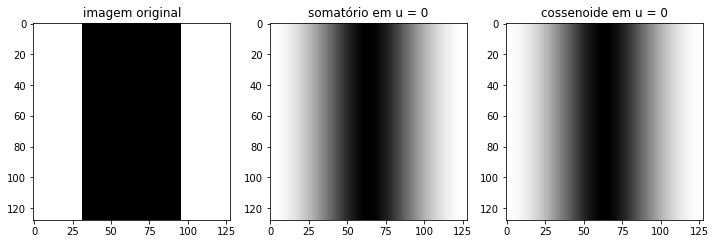

In [4]:
if testing:
    # Processo interativo
    from ipywidgets import interact, interactive, fixed
    import ipywidgets as widgets
    import numpy as np

    f = 50 * np.ones((128,128))
    f[:,     : 32] = 200
    f[:,64+32:   ] = 200
    H,W = f.shape

    W_widget = widgets.IntSlider(min=0,max=(W//2)-1,step=1,value=0, continuous_update=False)
    interact(dftdecom.dftdecompose,f=fixed(f),u = W_widget);

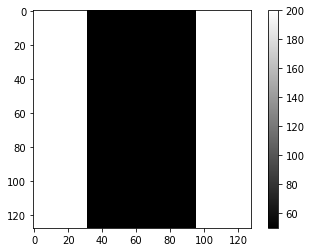

In [5]:
if testing:
    f = 50 * np.ones((128,128))
    f[:,     : 32] = 200
    f[:,64+32:   ] = 200
    plt.imshow(f,cmap='gray')
    plt.colorbar()

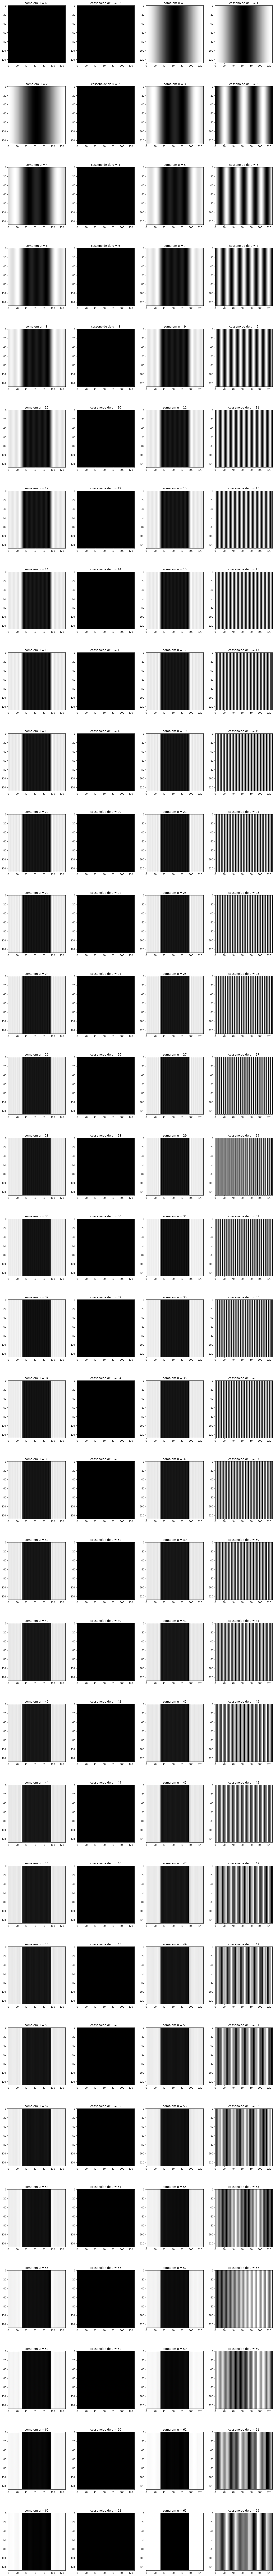

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f = 50 * np.ones((128,128))
f[:,     : 32] = 200
f[:,64+32:   ] = 200

F = np.fft.fft2(f) # Transfomada de f
H,W = f.shape

Fsum = np.zeros_like(F) # Variável acumulativa de cossenoides
Faux = np.zeros_like(F)

Faux[:,0] = F[:,0]
Fsum += Faux
plt.figure(figsize=[20,200])
plt.subplot(32,4,1)
plt.imshow(np.real(np.fft.ifft2(Fsum)),cmap='gray')
plt.title("soma em u = {}".format(u))

plt.subplot(32,4,2)
plt.imshow(np.real(np.fft.ifft2(Faux)),cmap='gray')
plt.title("cossenoide de u = {}".format(u))

for u in range(1,W//2):
    Faux = np.zeros_like(F) 

    # Extraindo a cossenoide em u
    Faux[:,u] = F[:,u]
    Faux[:,W-u] = F[:,W-u]

    Fsum += Faux # Acumulando as cossenoides 

    plt.subplot(32,4,(u*2)+1)
    plt.imshow(np.real(np.fft.ifft2(Fsum)),cmap='gray')
    plt.title("soma em u = {}".format(u))

    plt.subplot(32,4,(u*2)+2)
    plt.imshow(np.real(np.fft.ifft2(Faux)),cmap='gray')
    plt.title("cossenoide de u = {}".format(u))

In [21]:
#import numpy as np
#f = np.array([200,200,50,50,50,50,200,200])
#f = np.array([f,f,f,f])
#print(f)

[[200 200  50  50  50  50 200 200]
 [200 200  50  50  50  50 200 200]
 [200 200  50  50  50  50 200 200]
 [200 200  50  50  50  50 200 200]]


In [24]:
#F = np.fft.fft2(f)
#print(F)

TypeError: 'precision' is an invalid keyword argument for this function

In [6]:
#frestaurado = np.fft.ifft2(F)
#print(frestaurado)

[[ 200.+0.j   50.+0.j   50.+0.j  200.+0.j]
 [ 200.+0.j   50.+0.j   50.+0.j  200.+0.j]
 [ 200.+0.j   50.+0.j   50.+0.j  200.+0.j]
 [ 200.+0.j   50.+0.j   50.+0.j  200.+0.j]]


In [9]:
#Faux = np.zeros_like(F)
#Faux[0,0] = F[0,0]
#print(Faux)

[[ 2000.+0.j     0.+0.j     0.+0.j     0.+0.j]
 [    0.+0.j     0.+0.j     0.+0.j     0.+0.j]
 [    0.+0.j     0.+0.j     0.+0.j     0.+0.j]
 [    0.+0.j     0.+0.j     0.+0.j     0.+0.j]]


In [11]:
#fr0 = np.fft.ifft2(Faux)
#print(np.abs(fr0))

[[ 125.  125.  125.  125.]
 [ 125.  125.  125.  125.]
 [ 125.  125.  125.  125.]
 [ 125.  125.  125.  125.]]


In [14]:
#se F(u) = F+(u), então f(x) é real, do contráario é imaginário
#resultado imaginário
#Faux[0,1] = F[0,1]
#fr0 = np.fft.ifft2(Faux)
#print(Faux)
#print((fr0))

[[ 2000.  +0.j   600.+600.j     0.  +0.j     0.  +0.j]
 [    0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j]
 [    0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j]
 [    0.  +0.j     0.  +0.j     0.  +0.j     0.  +0.j]]
[[ 162.5+37.5j   87.5+37.5j   87.5-37.5j  162.5-37.5j]
 [ 162.5+37.5j   87.5+37.5j   87.5-37.5j  162.5-37.5j]
 [ 162.5+37.5j   87.5+37.5j   87.5-37.5j  162.5-37.5j]
 [ 162.5+37.5j   87.5+37.5j   87.5-37.5j  162.5-37.5j]]


In [ ]:
#resultado real
#Faux = np.zeros_like(F)
#Faux[0,1] = F[0,1]
#Faux[0,-1] = F[0,-1]
#fr0 = np.fft.ifft2(Faux)
#print(Faux)
#print((fr0))

[[ 160.02432602-0.47122325j  159.06620621-0.49626127j
   158.02654360-0.51263286j ...,  162.34788134-0.35422527j
   161.67060871-0.39913304j  160.89439743-0.4384984j ]
 [ 158.28725318-0.30350473j  157.44443438-0.31828913j
   156.52247352-0.32676808j ...,  160.28596295-0.23078364j
   159.71281647-0.25876797j  159.04509871-0.28334117j]
 [ 156.35201228-0.12248261j  155.60331382-0.13120306j
   154.77673957-0.13618869j ...,  158.08174824-0.08289337j
   157.59546029-0.09741719j  157.01758762-0.11091783j]
 ..., 
 [ 163.74065641-0.88924243j  162.34475346-0.96572458j
   160.85393243-1.02793753j ...,  167.27353122-0.58703161j
   166.21276509-0.69849324j  165.03270799-0.79971566j]
 [ 162.77706065-0.76456922j  161.53860135-0.82105131j
   160.21063345-0.86486663j ...,  165.87847571-0.53095777j
   164.95391760-0.618238j    163.91793959-0.69655183j]
 [ 161.53041975-0.62507669j  160.43918842-0.66418931j
   159.26293503-0.69250825j ...,  164.22504706-0.45388986j
   163.42950572-0.51875375j  162.5293716

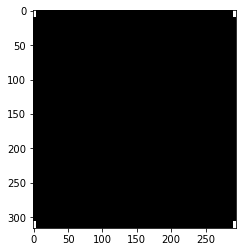

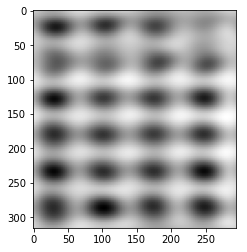

In [22]:
if testing:
    %matplotlib inline
    import matplotlib.image as mpimg
    import numpy as np
    import matplotlib.pyplot as plt

    U,V = (10,5)
    f = mpimg.imread('/home/lotufo/ia898/data/keyb.tif')
    F = np.fft.fft2(f)
    H = np.zeros_like(F)
    plt.figure(1)
    plt.imshow(f,cmap='gray')

    H[:U,:V]=1
    H[-U:,-V:]=1
    H[:U,-V:]=1
    H[-U:,:V]=1

    plt.imshow(H.real,cmap='gray')


    Fh = F*H

    plt.figure(2)
    fh = np.fft.ifft2(Fh)
    ft = np.fft.ifft2(F)


    plt.imshow(fh.real,cmap='gray')

    print(fh)